In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

## 1. Loading data from S3

In [2]:
# s3_uri = "s3://aws-athena-query-results-378141045805-eu-west-1/primary/e28fee6c-ad6a-429f-9a52-8dff2c0481c3.csv"

In [3]:
# Path to the local data
# The variable name is kept unchanged for future references
s3_uri = "../data/smart-climate-2021/e28fee6c-ad6a-429f-9a52-8dff2c0481c3.csv"

In [4]:
climate_data_2021_original = pd.read_csv(s3_uri)
climate_data_2021 = climate_data_2021_original.copy()
climate_data_2021.shape

(176374, 69)

In [5]:
climate_data_2021.head()

,c_van17,c_driveid,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_min_diff_ms_blower_level,c_blower_style,c_min_diff_ms_blower_style,c_air_dist,c_min_diff_ms_air_dist,c_auto_mode,c_min_diff_ms_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_city_drive,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_gpsregion_geohash_drive,c_gps_data_source,c_hub,c_country_iso_code,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,c_first_last_mode
0,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:30:37.899,18.5,Off,OFF,Off,258.0,KS_1,193.0,MITTE,inf,AUTO_OFF,2195.0,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,1,16,1026,0,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
1,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:30:37.900,20.0,Off,OFF,Off,258.0,KS_1,193.0,MITTE,inf,AUTO_OFF,2195.0,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,2,16,1026,24,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
2,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:31:01.323,20.0,Off,OFF,Off,258.0,KS_5,193.0,MITTE,inf,AUTO_OFF,2195.0,WOHNEN,WOHNEN,3,16,1026,5,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
3,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:31:06.786,20.0,Off,OFF,Off,258.0,KS_5,193.0,MITTE,inf,AUTO_OFF,2195.0,FAHREN,FAHREN,4,16,1026,18,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
4,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:31:24.081,16.0,KS_5,AUTO,BL_5,258.0,KS_5,193.0,MITTE,inf,AUTO_ON,2195.0,FAHREN,FAHREN,5,16,1026,3,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF


## 2. Preprocessing steps

### 2.1 Drop irrelevant columns

In [6]:
# not_relevant_columns = [
#     'c_min_diff_ms_blower_level',
#     'c_min_diff_ms_blower_style',
#     'c_min_diff_ms_air_dist',
#     'c_min_diff_ms_auto_mode',
#     'c_min_diff_ms_target_temp',
#     'c_interiortemperature_startup_celsius',
#     'c_vehicle_live_time_days',
#     'c_gpsregion_geohash_drive',
#     'c_gps_data_source',
#     'c_hub',
# #     'c_country_iso_code',
# #     'c_hybriennzeichen',
#     'c_bcbehvenergystart_kwh',
#     'c_bcbehvenergyend_kwh',
# #     'c_touchscreen_used_count',
#     'c_first_last_mode',
# ]

In [7]:
# # We will drop the features which are not relevant for the smart climate usecase
# climate_data_2021 = climate_data_2021.drop(columns = not_relevant_columns)
# climate_data_2021.shape

### 2.2 Check for missing values

In [8]:
# missing_vals_check = climate_data_2021.isna().sum()

In [9]:
# missing_val_feature_and_count = missing_vals_check[missing_vals_check>0]
# missing_val_cols = missing_val_feature_and_count.keys().tolist()
# missing_val_cols

In [10]:
# # Drop the columns with missing values
# climate_data_2021 = climate_data_2021.drop(missing_val_cols, axis=1)
# climate_data_2021.shape

In [11]:
# # Finally check if there is any missing value remaining
# climate_data_2021.isna().sum()

### 2.3 Uniquely identifyable cars

In [12]:
# car_specific_features = ['c_marketing_name', 
#      'c_steering_wheel_position', 
#      'c_brand', 
#      'c_product_line',
#      'c_derivat',
#      'c_brand',
#      'c_order_country',
#      'c_hybridkennzeichen',
#      'c_vehicle_class',
#     ]

In [13]:
# # We are not using this rather using the c_van17
# total_uniq_cars = climate_data_2021.groupby(
#     car_specific_features).count()
# print(f"Total number of uniquely identifyable cars: {total_uniq_cars.shape[0]}")

## 3. Data analysis

### 3.1 Analyze drives

In [15]:
# Total number of drives
climate_data_2021['c_driveid'].nunique()

10000

#### 3.1.1 Analyze number of events per drive

In [16]:
# Getting the number of events per drive
number_of_events_per_drive = climate_data_2021['c_driveid'].value_counts()
# min, max, mean and median event count per drive
number_of_events_per_drive.min(), number_of_events_per_drive.max(), number_of_events_per_drive.mean(), number_of_events_per_drive.median()

(15, 88, 17.6374, 16.0)

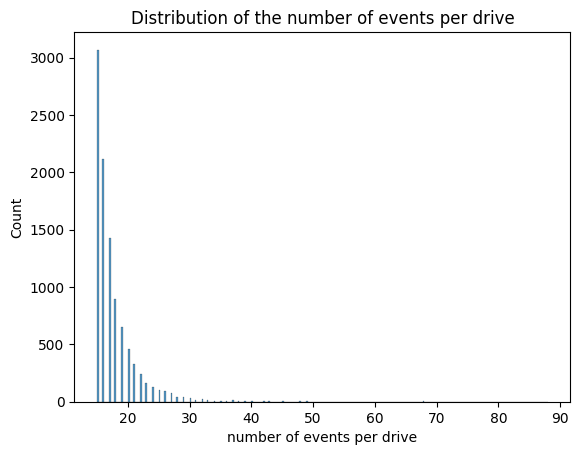

In [17]:
sns.histplot(number_of_events_per_drive)
plt.xlabel('number of events per drive')
plt.title("Distribution of the number of events per drive")
plt.show()

#### 3.1.2 Analyze number of drives per car

In [18]:
# Number of unique cars
drive_count_per_car = climate_data_2021['c_van17'].value_counts()
print(f"Total number of unique vehicles: {drive_count_per_car.shape[0]}")

Total number of unique vehicles: 9742


In [19]:
# Number of drives per car
# min, max, mean and median number of drives per car
drive_count_per_car.min(), drive_count_per_car.max(), drive_count_per_car.mean(), drive_count_per_car.median()

(15, 107, 18.104495996715254, 16.0)

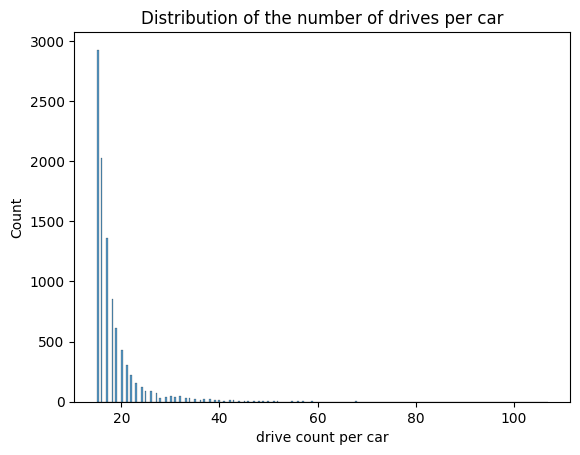

In [27]:
# Drive count per car distribution
sns.histplot(drive_count_per_car)
plt.xlabel('drive count per car')
plt.title("Distribution of the number of drives per car")
plt.show()

## 4. Analyze events

### 4.1 Analyze Event duration across all events

In [22]:
# Average event duration in seconds among all drives
climate_data_2021['c_event_duration_sec'].min(), climate_data_2021['c_event_duration_sec'].max(), climate_data_2021['c_event_duration_sec'].mean(), climate_data_2021['c_event_duration_sec'].median(), climate_data_2021['c_event_duration_sec'].std()

(0, 15714, 344.8267318312223, 86.0, 711.7980800724536)

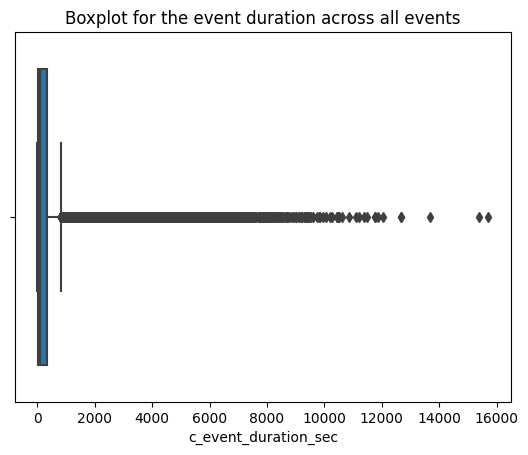

In [23]:
sns.boxplot(x=climate_data_2021['c_event_duration_sec'])
plt.title('Boxplot for the event duration across all events')
plt.show()

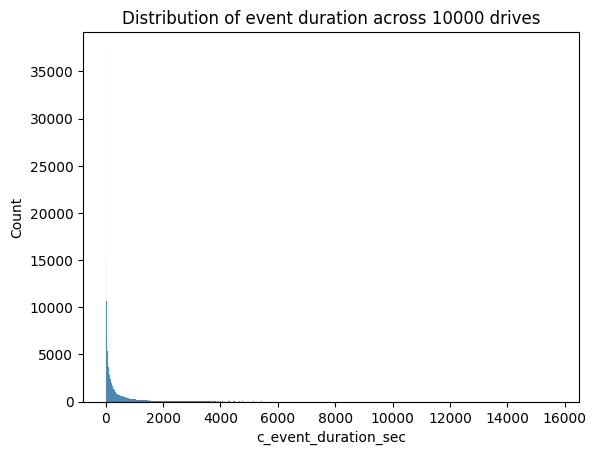

In [24]:
event_durations = climate_data_2021['c_event_duration_sec']
sns.histplot(event_durations)
plt.title(f"Distribution of event duration across {climate_data_2021['c_driveid'].nunique()} drives")
plt.show()

In [25]:
# There are some events with a duration of 0 second
# Total number of events with 0 second duration
(climate_data_2021['c_event_duration_sec'] == 0).sum()

1804

### 4.2 Analyze the elapsed time between the drive start and the occurence of the first event

In [26]:
climate_data_2021['c_drive_timestamp_start'] =  pd.to_datetime(climate_data_2021['c_drive_timestamp_start'])
climate_data_2021['c_msg_creation_timestamp'] = pd.to_datetime(climate_data_2021['c_msg_creation_timestamp'])
climate_data_2021['c_drive_timestamp_stop'] = pd.to_datetime(climate_data_2021['c_drive_timestamp_stop'])

grouped_data = climate_data_2021.groupby('c_driveid')
time_from_drive_start_to_first_event = (grouped_data['c_msg_creation_timestamp'].min() - grouped_data['c_drive_timestamp_start'].first()).dt.total_seconds()
time_from_drive_start_to_first_event.shape

(10000,)

In [27]:
# min, max, mean and median elapsed time from the drive time to first event in seconds
time_from_drive_start_to_first_event.min(), time_from_drive_start_to_first_event.max(), time_from_drive_start_to_first_event.mean(), time_from_drive_start_to_first_event.median()

(0.001, 7.583, 0.3518887, 0.226)

In [28]:
# Number of drives where the first event occurred before 1 second had passed
(time_from_drive_start_to_first_event < 1).sum()

9454

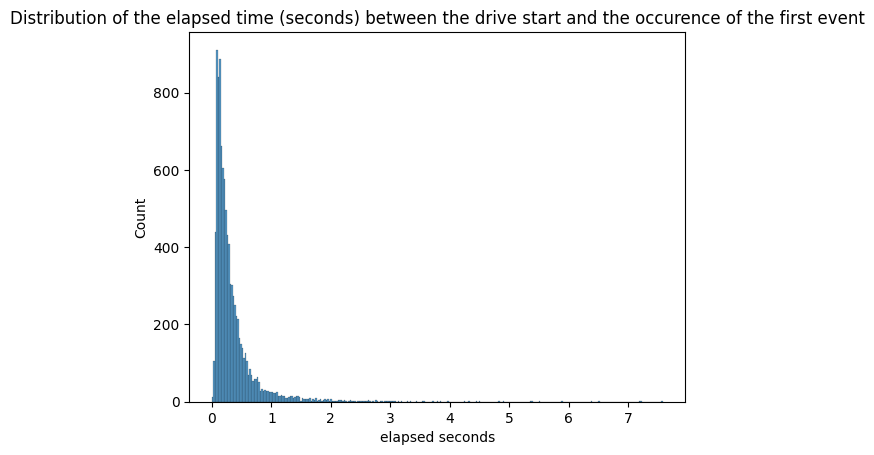

In [29]:
sns.histplot(time_from_drive_start_to_first_event)
plt.title('Distribution of the elapsed time (seconds) between the drive start and the occurence of the first event')
plt.xlabel('elapsed seconds')
plt.show()

In [30]:
# Check if there are any drives where the first event took place after 0 second of the start of the drive
(time_from_drive_start_to_first_event==0.0).sum()

0

### 4.2 Analyze the elapsed time between the last event and the drive end

In [31]:
last_event_to_drive_end = (grouped_data['c_drive_timestamp_stop'].first() - grouped_data['c_msg_creation_timestamp'].max()).dt.total_seconds()

# abs(pd.to_datetime(climate_data_2021.groupby(['c_driveid', 'c_drive_timestamp_stop'])['c_msg_creation_timestamp'].transform("max")) - pd.to_datetime(climate_data_2021['c_drive_timestamp_stop'])).dt.total_seconds() * 1000
last_event_to_drive_end.shape

(10000,)

In [33]:
# min, max, mean and median elapsed time from the last event to drive end
last_event_to_drive_end.min(), last_event_to_drive_end.max(), last_event_to_drive_end.mean(), last_event_to_drive_end.median(), last_event_to_drive_end.std()

(0.0, 5692.863, 5.7696846, 1.5770000000000002, 103.22229996954644)

In [34]:
# Check if there are any drives where the last event ended with the drive end
(last_event_to_drive_end==0.0).sum()

9

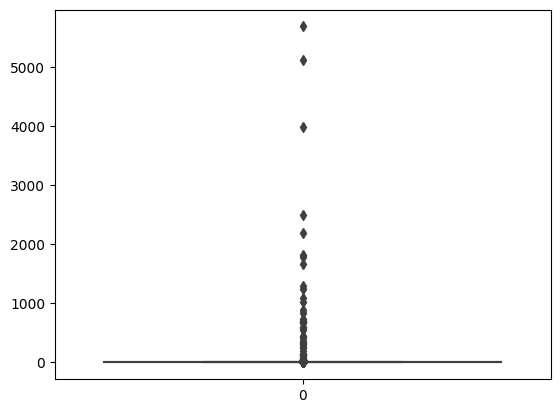

In [35]:
sns.boxplot(last_event_to_drive_end)
plt.show("Boxplot of the time difference of the last event and drive end among all drives")

In [41]:
# sns.histplot(last_event_to_drive_end)
# plt.title('Distribution of the elapsed time between the last event and the drive end time')
# plt.xlabel('elapsed seconds')

### 4.3 Anomaly check

In [36]:
# Check if the first event occurred before the drive started
# Check if there are any drives where the last event ended with the drive end
(time_from_drive_start_to_first_event < 0).sum()

0

In [37]:
# Check if the last event occurred after the drive ended
# Check if there are any drives where the last event ended with the drive end
(last_event_to_drive_end < 0).sum()

0

## 5. Analyze drives

### 5.1 Analyze drive distribution on different days of the week

In [38]:
weekday_drive_counts = climate_data_2021['c_drive_weekday'].value_counts().reset_index()
weekday_drive_counts
weekday_drive_counts.columns = ['Weekday', 'Count']
weekday_drive_counts

,Weekday,Count
0,Sat,30488
1,Fri,28554
2,Sun,27571
3,Thu,23580
4,Mon,23258
5,Tue,21581
6,Wed,21342


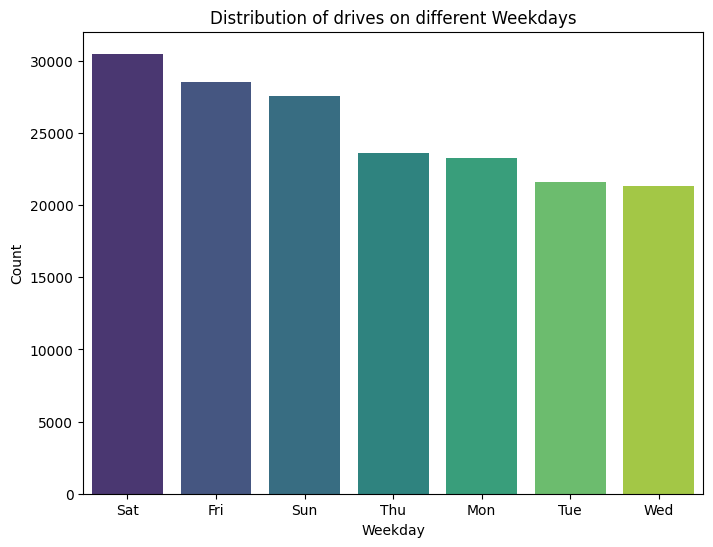

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Weekday', y='Count', data=weekday_drive_counts, palette='viridis')
plt.title('Distribution of drives on different Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

In [40]:
# total number of weekend drives
weekend_drives = (climate_data_2021.groupby('c_driveid')['c_weekend_drive'].sum() > 0).sum()
weekend_drives

3299

### 5.2 Analyze drives based on the time of the drive

In [41]:
# Find the drive distribution according to different time intervals
# Convert the 'timestamp' column to datetime type
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the time intervals
time_intervals = ['01:00-03:00', 
                  '03:00-05:00', 
                  '05:00-07:00',
                  '07:00-09:00', 
                  '09:00-11:00', 
                  '11:00-13:00', 
                  '13:00-15:00', 
                  '15:00-17:00', 
                  '17:00-19:00', 
                  '19:00-21:00', 
                  '21:00-23:00',
                  '23:00-01:00'
                 ]
bins = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

# Create a new column to represent the time interval
climate_data_2021['time_interval'] = pd.cut(pd.to_datetime(climate_data_2021['c_drive_timestamp_start']).dt.hour, bins=bins, labels=time_intervals, right=False)

# Count the number of rides in each time interval
drive_counts = climate_data_2021['time_interval'].value_counts().sort_index().reset_index()
drive_counts.columns = ['Time Interval', 'Drive Counts']

# Print the counts
# print("Drive Counts:")
# print(drive_counts)

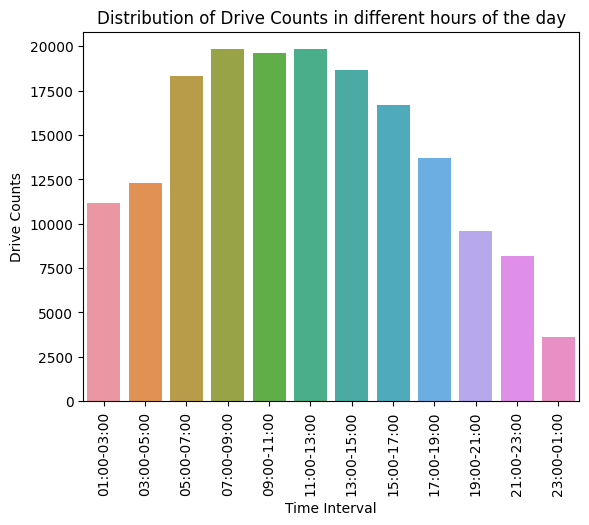

In [42]:
# Plot the distribution

drive_counts
# Plot the barplot
sns.barplot(data=drive_counts, x='Time Interval', y='Drive Counts')
plt.xlabel('Time Interval')
plt.ylabel('Drive Counts')
plt.xticks(rotation=90) 
plt.title('Distribution of Drive Counts in different hours of the day')
plt.show()

### 5.3 Analyze the distribution of the drive duration

In [45]:
# min, max, mean and median drive durations
climate_data_2021['c_drive_duration_sec'].min(), climate_data_2021['c_drive_duration_sec'].max(), climate_data_2021['c_drive_duration_sec'].mean(), climate_data_2021['c_drive_duration_sec'].median(), climate_data_2021['c_drive_duration_sec'].std()

(80, 17957, 6302.727885062424, 5347.0, 3883.3201493363517)

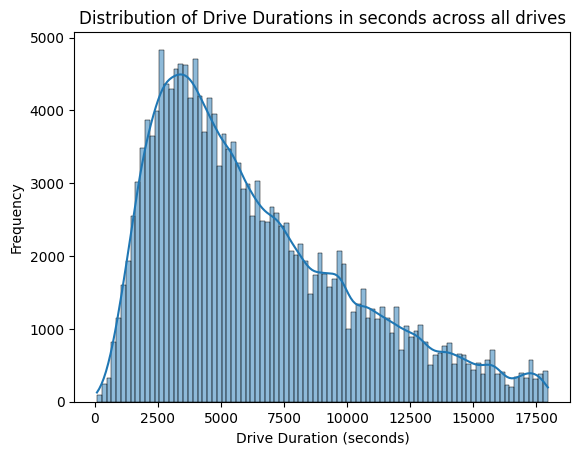

In [44]:
# Plot histogram
sns.histplot(data=climate_data_2021['c_drive_duration_sec'], kde=True)
plt.xlabel('Drive Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Drive Durations in seconds across all drives')
plt.show()

In [72]:
drive_durations = climate_data_2021.groupby('c_driveid')['c_drive_duration_sec'].first()

In [79]:
event_counts = climate_data_2021['c_driveid'].value_counts()

In [81]:
drive_durations = climate_data_2021.groupby('c_driveid')['c_drive_duration_sec'].first()

In [76]:
# # Calculate the drive duration and number of events correlation
# correlation = event_counts.corr(climate_data_2021.groupby('c_driveid')['c_drive_duration_sec'].first())
# correlation

0.265416201612829

In [82]:
correlation = event_counts.corr(drive_durations)
correlation

0.265416201612829

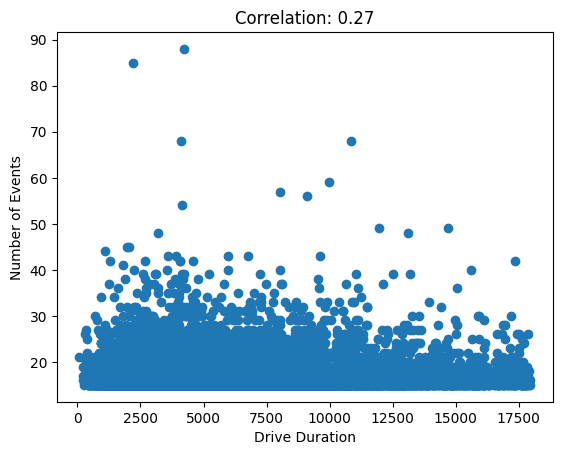

In [85]:
# Plot the correlation
fig, ax = plt.subplots()
ax.scatter(drive_durations, event_counts)
ax.set_xlabel('Drive Duration')
ax.set_ylabel('Number of Events')
ax.set_title('Correlation: ' + str(round(correlation, 2)))
plt.show()

### 5.4 Analyzing the drive with maximum event count

In [46]:
drive_id_of_max_events = climate_data_2021['c_driveid'].value_counts().idxmax()
drive_id_of_max_events

'DRC585UJ2TQ95ZWRN'

In [47]:
drive_with_highest_events = climate_data_2021[climate_data_2021['c_driveid'] == drive_id_of_max_events]
drive_with_highest_events.shape

(88, 70)

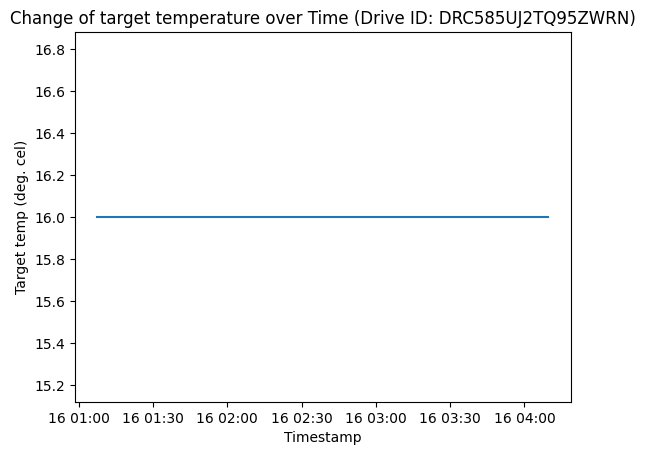

In [48]:
# See how the temperature changed across the drive
plt.plot(drive_with_highest_events['c_msg_creation_timestamp'], drive_with_highest_events['c_target_temp'])
plt.xlabel('Timestamp')
plt.ylabel('Target temp (deg. cel)')
plt.title('Change of target temperature over Time (Drive ID: {})'.format(drive_id_of_max_events))
plt.show()

### 5.5 Capturing the temperature change within drives

##### A event change is defined as a change in the target_temp value

In [49]:
# To see how many unique temp values each drive has - a distribution
climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().min(), climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().max(), climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().mean(), climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().median()

(1, 14, 3.0269, 3.0)

In [50]:
# Calculate the difference in target teamp in two successive timestamps for each driveid
climate_data_2021['d_diff_in_target_temp'] = climate_data_2021.sort_values(['c_driveid', 'c_msg_creation_timestamp']).groupby('c_driveid')['c_target_temp'].diff()
# climate_data_2021

In [61]:
# Group the data by visit_id and count the number of d_diff values that are greater than zero
temp_change_counts = climate_data_2021.groupby('c_driveid')['d_diff_in_target_temp'].apply(lambda x: (x != 0).sum())

# Print the resulting temp_change counts
temp_change_counts.min(), temp_change_counts.max(), temp_change_counts.mean(), temp_change_counts.median()

(1, 44, 4.7146, 4.0)

<AxesSubplot:xlabel='d_diff_in_target_temp', ylabel='Count'>

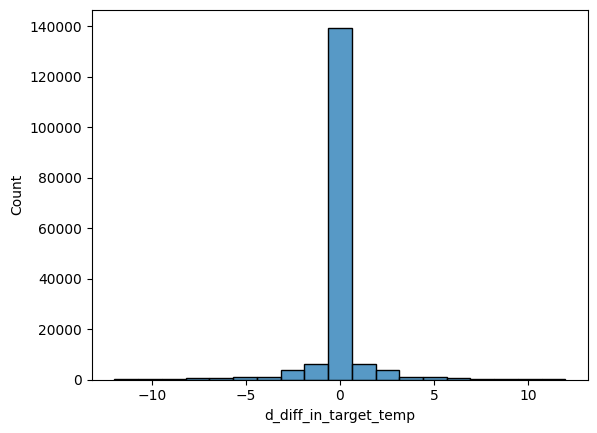

In [51]:
# Distribution of the temperature difference between successive events
sns.histplot(climate_data_2021['d_diff_in_target_temp'])

In [60]:
# Check across how many drives the temperature didn't change at all
drive_wise_temp_change = (climate_data_2021.groupby('c_driveid')['d_diff_in_target_temp'].agg(lambda x: abs(x).sum()) == 0.0)
drive_wise_temp_change.sum()

2576

In [59]:
# Get those drive ids where the temp didn't change at all during the drive
drive_ids_with_no_temp_change = drive_wise_temp_change[drive_wise_temp_change == True].index.tolist()
len(drive_ids_with_no_temp_change)

2576

In [60]:
# Just check one drive to validate
climate_data_2021[climate_data_2021['c_driveid'] == drive_ids_with_no_temp_change[0]]['c_target_temp']

128971    16.0
128972    16.0
128973    16.0
128974    16.0
128975    16.0
128976    16.0
128977    16.0
128978    16.0
128979    16.0
128980    16.0
128981    16.0
128982    16.0
128983    16.0
128984    16.0
128985    16.0
128986    16.0
128987    16.0
128988    16.0
Name: c_target_temp, dtype: float64

In [61]:
# How many events had temperatures of only 16.0 or 28.0
df_with_no_temp_change = climate_data_2021[climate_data_2021['c_driveid'].isin(drive_ids_with_no_temp_change)]

# number of drives where the temp was 16 or 28 throughout the whole drive
df_with_no_temp_change[df_with_no_temp_change['c_target_temp'].isin([16.0, 28.0])]['c_driveid'].nunique()

838

In [62]:
# Get the drive ids where the temp was either 16 or 28 throughout the whole drive
drive_ids_of_16_and_28 = df_with_no_temp_change[df_with_no_temp_change['c_target_temp'].isin([16.0, 28.0])]['c_driveid'].tolist()

In [63]:
# # What was the drive duration distribution of these drives where the temp was at 16 or 28?
# sns.histplot(df_with_no_temp_change[df_with_no_temp_change['c_target_temp'] == 16.0]['c_drive_duration_sec'], kde=True)
# plt.title("Distribution of the drive duration of the drives where the target temp was 16.0")
# plt.show()

### 5.6 Analyze the distribution of target temperature

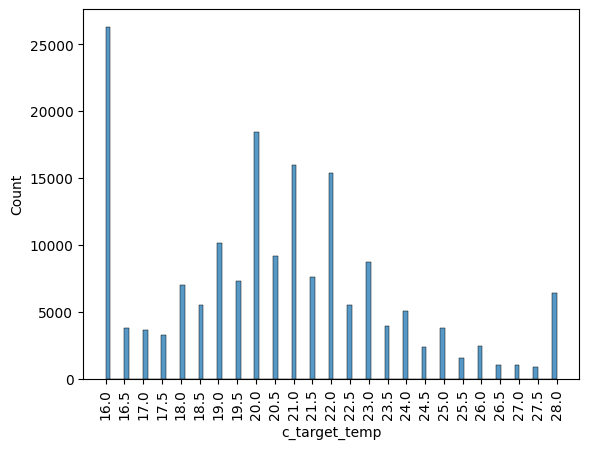

In [64]:
ticks = np.arange(16, 28.5, 0.5)
sns.histplot(climate_data_2021['c_target_temp'])
plt.xticks(ticks)
plt.xticks(rotation=90)
plt.show()

In [65]:
# How many temperature values are there
len(sorted(climate_data_2021['c_target_temp'].unique()))

25

In [66]:
drive_durations_for_temp_16 = climate_data_2021[climate_data_2021['c_target_temp'] == 16.0]['c_drive_duration_sec']
drive_durations_for_temp_28 = climate_data_2021[climate_data_2021['c_target_temp'] == 28.0]['c_drive_duration_sec']

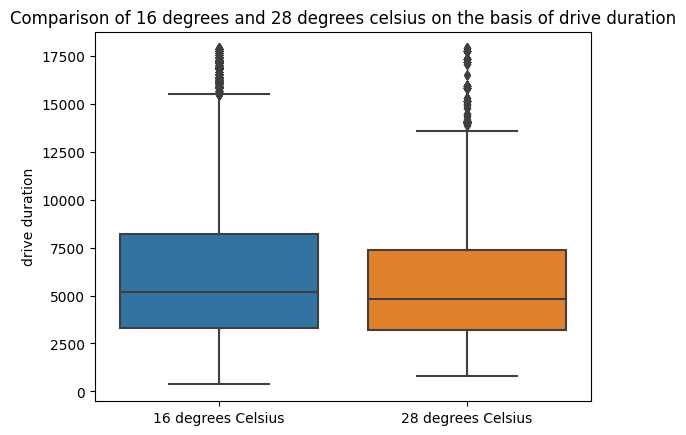

In [67]:
# Create a figure and axis object
fig, ax = plt.subplots()
# Create the boxplots side by side
sns.boxplot(data=[drive_durations_for_temp_16, drive_durations_for_temp_28], ax=ax)
# Set labels and title
ax.set_xticklabels(['16 degrees Celsius', '28 degrees Celsius'])
ax.set_ylabel('drive duration')
ax.set_title('Comparison of 16 degrees and 28 degrees celsius on the basis of drive duration')

# Show the plot
plt.show()

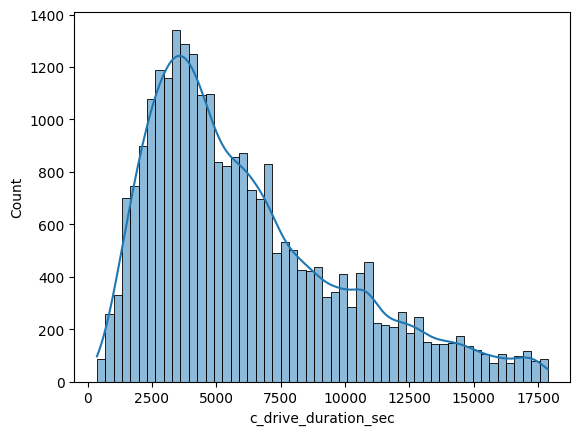

In [68]:
sns.histplot(climate_data_2021[climate_data_2021['c_target_temp'] == 16.0]['c_drive_duration_sec'], kde=True)
plt.show()

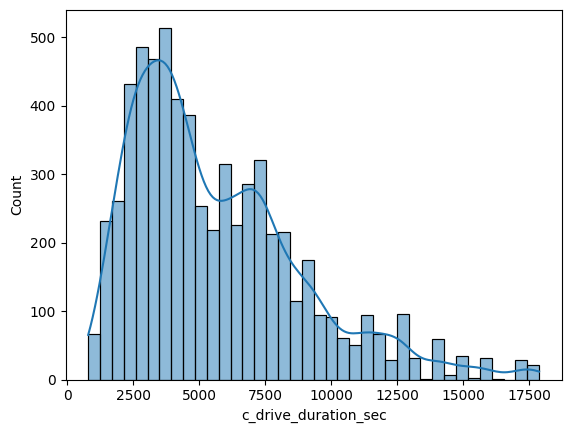

In [69]:
sns.histplot(climate_data_2021[climate_data_2021['c_target_temp'] == 28.0]['c_drive_duration_sec'], kde=True)
plt.show()

#### Investigate the seasonal change

In [70]:
def get_season(date):
    month = int(date.split('_')[1])
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [71]:
df_with_no_temp_change.head()

,c_van17,c_driveid,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_blower_style,c_air_dist,c_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,time_interval,d_diff_in_target_temp
66,AAMYuz1dxp5s5f4oGueV6A3ooUfQM7Vjamd74JOPwZmLGx...,4ZJPEZW564QKMSVZZ,2021-01-24 04:20:30.531,2021-01-24 04:46:21.619,2021-01-24 04:20:30.606,24.5,KS_2,OFF,Off,KS_2,OBEN,AUTO_ON,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,1,15,1351,19,5.5,6.25,7.0,1551,25.9,Sun,2021_1_24,3_2021,True,2.21,15.47,67.26,JP,BMW,G20,320d xDrive,RL,LC,NOHY,diesel,KKL+,MGUV5,16.96,2751.1,2758.45,7.35,315,1844,NOT_AVAILABLE,False,False,False,0,03:00-05:00,NaN
67,AAMYuz1dxp5s5f4oGueV6A3ooUfQM7Vjamd74JOPwZmLGx...,4ZJPEZW564QKMSVZZ,2021-01-24 04:20:30.531,2021-01-24 04:46:21.619,2021-01-24 04:20:49.029,24.5,KS_2,AUTO,BL_2,KS_2,OBEN,AUTO_ON,WOHNEN,WOHNEN,2,15,1351,9,5.5,6.25,7.0,1551,25.9,Sun,2021_1_24,3_2021,True,2.21,15.47,67.26,JP,BMW,G20,320d xDrive,RL,LC,NOHY,diesel,KKL+,MGUV5,16.96,2751.1,2758.45,7.35,315,1844,NOT_AVAILABLE,False,False,False,0,03:00-05:00,0.0
68,AAMYuz1dxp5s5f4oGueV6A3ooUfQM7Vjamd74JOPwZmLGx...,4ZJPEZW564QKMSVZZ,2021-01-24 04:20:30.531,2021-01-24 04:46:21.619,2021-01-24 04:20:58.875,24.5,KS_2,AUTO,BL_2,KS_2,OBEN,AUTO_ON,FAHRBEREITSCHAFT_HERSTELLEN,FAHREN,3,15,1351,196,5.5,6.25,7.0,1551,25.9,Sun,2021_1_24,3_2021,True,2.21,15.47,67.26,JP,BMW,G20,320d xDrive,RL,LC,NOHY,diesel,KKL+,MGUV5,16.96,2751.1,2758.45,7.35,315,1844,NOT_AVAILABLE,False,False,False,0,03:00-05:00,0.0
69,AAMYuz1dxp5s5f4oGueV6A3ooUfQM7Vjamd74JOPwZmLGx...,4ZJPEZW564QKMSVZZ,2021-01-24 04:20:30.531,2021-01-24 04:46:21.619,2021-01-24 04:24:14.599,24.5,KS_2,OFF,Off,KS_2,OBEN,AUTO_ON,FAHRBEREITSCHAFT_BEENDEN,WOHNEN,4,15,1351,3,5.5,6.25,7.0,1551,25.9,Sun,2021_1_24,3_2021,True,2.21,15.47,67.26,JP,BMW,G20,320d xDrive,RL,LC,NOHY,diesel,KKL+,MGUV5,16.96,2751.1,2758.45,7.35,315,1844,NOT_AVAILABLE,False,False,False,0,03:00-05:00,0.0
70,AAMYuz1dxp5s5f4oGueV6A3ooUfQM7Vjamd74JOPwZmLGx...,4ZJPEZW564QKMSVZZ,2021-01-24 04:20:30.531,2021-01-24 04:46:21.619,2021-01-24 04:24:17.624,24.5,KS_2,OFF,Off,KS_2,OBEN,AUTO_ON,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,5,15,1351,46,5.5,6.25,7.0,1551,25.9,Sun,2021_1_24,3_2021,True,2.21,15.47,67.26,JP,BMW,G20,320d xDrive,RL,LC,NOHY,diesel,KKL+,MGUV5,16.96,2751.1,2758.45,7.35,315,1844,NOT_AVAILABLE,False,False,False,0,03:00-05:00,0.0


In [72]:
df_with_no_temp_change['d_season'] = df_with_no_temp_change['c_year_month_day'].apply(get_season)
df_with_no_temp_change.shape

/home/q621464/miniconda3/envs/decision-transformer-atari/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(44743, 54)

In [73]:
df_with_no_temp_change['d_season'].value_counts()

Summer    14672
Spring    12646
Winter    10814
Autumn     6611
Name: d_season, dtype: int64

In [74]:
df_with_no_temp_change[df_with_no_temp_change['c_target_temp'] == 16.0]['d_season'].value_counts()

Summer    6309
Spring    3177
Autumn    1970
Winter     948
Name: d_season, dtype: int64

In [75]:
chosen_season = 'Autumn'
ext_avg_temp_season_wise = df_with_no_temp_change[(df_with_no_temp_change['c_target_temp'] == 16.0) & (df_with_no_temp_change['d_season'] == chosen_season)][['c_exteriortemperature_avg_celsius']]

In [76]:
ext_avg_temp_season_wise.min(), ext_avg_temp_season_wise.max(), ext_avg_temp_season_wise.mean(), ext_avg_temp_season_wise.median()

(c_exteriortemperature_avg_celsius    10.25
 dtype: float64,
 c_exteriortemperature_avg_celsius    37.5
 dtype: float64,
 c_exteriortemperature_avg_celsius    24.51269
 dtype: float64,
 c_exteriortemperature_avg_celsius    24.75
 dtype: float64)

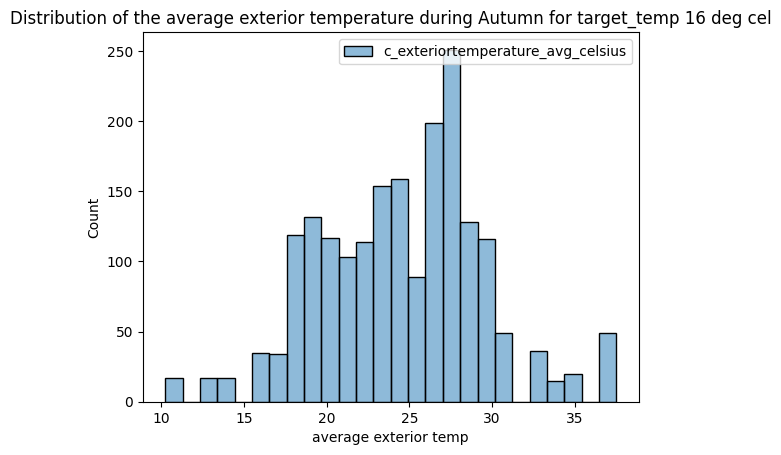

In [77]:
sns.histplot(ext_avg_temp_season_wise)
plt.title('Distribution of the average exterior temperature during {} for target_temp 16 deg cel'.format(chosen_season))
plt.xlabel('average exterior temp')
plt.show()

In [78]:
climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].nunique()

10000

In [79]:
(climate_data_2021['c_driveid'].value_counts() >= 15).sum()

10000

In [80]:
(climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts() >= 15).sum()

172

In [81]:
climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0][['c_target_temp', 'd_diff_in_target_temp']]

,c_target_temp,d_diff_in_target_temp
0,18.5,NaN
1,20.0,1.5
4,16.0,-4.0
16,21.5,NaN
18,22.5,1.0
...,...,...
176346,22.0,0.5
176347,21.5,-0.5
176356,21.0,NaN
176369,16.0,-5.0


In [82]:
# Now calculate the time difference distribution between two different target_temp change events
time_diff_bet_succ_events = climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0].groupby('c_driveid')['c_msg_creation_timestamp'].diff().dt.total_seconds()
time_diff_bet_succ_events

0             NaN
1           0.001
4          46.181
16            NaN
18          0.852
           ...   
176346    596.543
176347     47.048
176356        NaN
176369    841.739
176371    208.105
Name: c_msg_creation_timestamp, Length: 47146, dtype: float64

In [84]:
time_diff_bet_succ_events.shape

(47146,)

In [85]:
# different target temp in the same timestamp
(time_diff_bet_succ_events==0).sum()

50

In [86]:
# Distribution of target_temp change events drivewise now
climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().min(), climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().max(), climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().mean(), climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().median()

(1, 44, 4.7146, 4.0)

<AxesSubplot:xlabel='c_msg_creation_timestamp', ylabel='Count'>

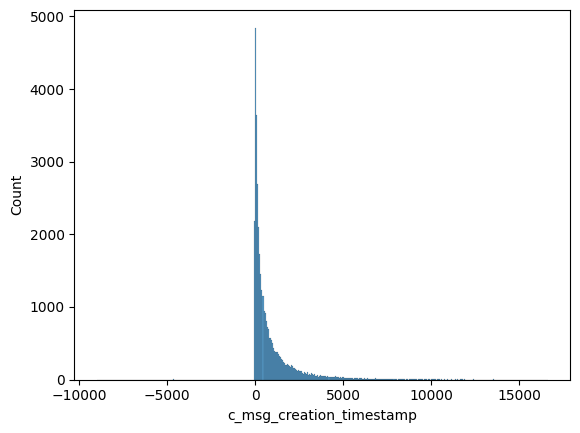

In [87]:
# Plot of the time difference
sns.histplot(time_diff_bet_succ_events)

## 7. Correlation analysis

In [86]:
numerical_columns = climate_data_2021.select_dtypes(include='number').columns
correlation_matrix = climate_data_2021[numerical_columns].corr().abs()
# print(correlation_matrix)
correlation_matrix

,c_target_temp,c_min_diff_ms_blower_level,c_min_diff_ms_blower_style,c_min_diff_ms_air_dist,c_min_diff_ms_auto_mode,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_touchscreen_used_count,d_diff_in_target_temp
c_target_temp,1.000000,0.006074,0.018779,0.009122,0.007569,0.000515,0.005154,0.013696,0.003553,0.012626,0.380576,0.387470,0.381532,0.283927,0.006257,0.006262,0.009286,0.013286,0.013286,0.013286,0.014146,0.091597,0.078031,0.009083,0.020533,0.020592,0.012706,0.010326,0.037387,0.059330,0.007095,0.009594,0.221102
c_min_diff_ms_blower_level,0.006074,1.000000,0.210503,0.002939,0.553433,0.002796,0.006455,0.048600,0.011834,0.000701,0.020113,0.015152,0.009858,0.006881,0.045477,0.045478,0.001919,0.025294,0.025294,0.025294,0.002316,0.007728,0.014911,0.045654,0.062586,0.062885,0.060744,0.006702,0.006030,0.014202,0.022660,0.002777,0.000274
c_min_diff_ms_blower_style,0.018779,0.210503,1.000000,0.037142,0.041381,0.005937,0.012728,0.159177,0.058701,0.068629,0.110387,0.093075,0.073396,0.067208,0.168867,0.168881,0.029245,0.036082,0.036082,0.036079,0.035891,0.064266,0.005182,0.119357,0.003378,0.004293,0.148318,0.016750,0.000208,0.006474,0.013555,0.007542,0.004017
c_min_diff_ms_air_dist,0.009122,0.002939,0.037142,1.000000,0.067327,0.016335,0.036508,0.064601,0.025556,0.019371,0.012203,0.005189,0.001780,0.002288,0.064201,0.064210,0.025164,0.011910,0.011910,0.011911,0.021486,0.022993,0.018906,0.058588,0.023811,0.024156,0.064422,0.009896,0.012212,0.003053,0.006439,0.009168,0.001398
c_min_diff_ms_auto_mode,0.007569,0.553433,0.041381,0.067327,1.000000,0.001591,0.003686,0.110487,0.029087,0.007350,0.011516,0.001886,0.014854,0.001983,0.100014,0.100018,0.000778,0.010978,0.010978,0.010979,0.000017,0.008010,0.002537,0.091559,0.081216,0.081823,0.115567,0.015689,0.015605,0.004605,0.007689,0.044787,0.000155
c_row_number_drive,0.000515,0.002796,0.005937,0.016335,0.001591,1.000000,0.431464,0.110906,0.003173,0.002685,0.031183,0.022825,0.013996,0.021020,0.125122,0.125121,0.008598,0.001785,0.001785,0.001785,0.002047,0.005061,0.005858,0.040013,0.005084,0.005539,0.084530,0.010375,0.009530,0.005628,0.000836,0.019637,0.011669
c_number_of_rows_drive,0.005154,0.006455,0.012728,0.036508,0.003686,0.431464,1.000000,0.257047,0.019165,0.006726,0.072273,0.052901,0.032438,0.048719,0.289995,0.289993,0.019928,0.004137,0.004137,0.004137,0.004984,0.011858,0.013725,0.092738,0.011783,0.012839,0.195914,0.024647,0.022634,0.013045,0.001937,0.045513,0.001300
c_only_driving_duration_sec,0.013696,0.048600,0.159177,0.064601,0.110487,0.110906,0.257047,1.000000,0.261112,0.056821,0.062550,0.010179,0.080207,0.021696,0.967634,0.967633,0.011984,0.046336,0.046336,0.046336,0.034557,0.027832,0.012144,0.568664,0.084401,0.088844,0.828220,0.071563,0.028360,0.015544,0.044995,0.061453,0.001787
c_event_duration_sec,0.003553,0.011834,0.058701,0.025556,0.029087,0.003173,0.019165,0.261112,1.000000,0.019272,0.017367,0.001565,0.019829,0.004073,0.266536,0.266536,0.000536,0.011003,0.011003,0.011003,0.013180,0.008053,0.002153,0.139794,0.027535,0.028686,0.215034,0.019193,0.008377,0.002577,0.009173,0.015257,0.010731
c_min_diff_ms_target_temp,0.012626,0.000701,0.068629,0.019371,0.007350,0.002685,0.006726,0.056821,0.019272,1.000000,0.028330,0.024601,0.020183,0.014994,0.062623,0.062623,0.009542,0.012479,0.012479,0.012480,0.006954,0.025688,0.010490,0.002288,0.023758,0.023887,0.025211,0.013250,0.011686,0.002246,0.011731,0.003778,0.000453


In [87]:
correlation_threshold = 0.8  # Define the correlation threshold

# Filter the correlation matrix for features with correlation above the threshold
high_correlation_features = correlation_matrix[np.abs(correlation_matrix) > correlation_threshold].stack().dropna()


In [88]:
high_correlation_features

c_target_temp                          c_target_temp                            1.000000
c_min_diff_ms_blower_level             c_min_diff_ms_blower_level               1.000000
c_min_diff_ms_blower_style             c_min_diff_ms_blower_style               1.000000
c_min_diff_ms_air_dist                 c_min_diff_ms_air_dist                   1.000000
c_min_diff_ms_auto_mode                c_min_diff_ms_auto_mode                  1.000000
c_row_number_drive                     c_row_number_drive                       1.000000
c_number_of_rows_drive                 c_number_of_rows_drive                   1.000000
c_only_driving_duration_sec            c_only_driving_duration_sec              1.000000
                                       c_drive_duration_sec                     0.967634
                                       c_drive_duration_minutes                 0.967633
                                       c_mileage_delta                          0.828220
c_event_duration_sec 

In [89]:
correlation_matrix

,c_target_temp,c_min_diff_ms_blower_level,c_min_diff_ms_blower_style,c_min_diff_ms_air_dist,c_min_diff_ms_auto_mode,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_touchscreen_used_count,d_diff_in_target_temp
c_target_temp,1.000000,0.006074,0.018779,0.009122,0.007569,0.000515,0.005154,0.013696,0.003553,0.012626,0.380576,0.387470,0.381532,0.283927,0.006257,0.006262,0.009286,0.013286,0.013286,0.013286,0.014146,0.091597,0.078031,0.009083,0.020533,0.020592,0.012706,0.010326,0.037387,0.059330,0.007095,0.009594,0.221102
c_min_diff_ms_blower_level,0.006074,1.000000,0.210503,0.002939,0.553433,0.002796,0.006455,0.048600,0.011834,0.000701,0.020113,0.015152,0.009858,0.006881,0.045477,0.045478,0.001919,0.025294,0.025294,0.025294,0.002316,0.007728,0.014911,0.045654,0.062586,0.062885,0.060744,0.006702,0.006030,0.014202,0.022660,0.002777,0.000274
c_min_diff_ms_blower_style,0.018779,0.210503,1.000000,0.037142,0.041381,0.005937,0.012728,0.159177,0.058701,0.068629,0.110387,0.093075,0.073396,0.067208,0.168867,0.168881,0.029245,0.036082,0.036082,0.036079,0.035891,0.064266,0.005182,0.119357,0.003378,0.004293,0.148318,0.016750,0.000208,0.006474,0.013555,0.007542,0.004017
c_min_diff_ms_air_dist,0.009122,0.002939,0.037142,1.000000,0.067327,0.016335,0.036508,0.064601,0.025556,0.019371,0.012203,0.005189,0.001780,0.002288,0.064201,0.064210,0.025164,0.011910,0.011910,0.011911,0.021486,0.022993,0.018906,0.058588,0.023811,0.024156,0.064422,0.009896,0.012212,0.003053,0.006439,0.009168,0.001398
c_min_diff_ms_auto_mode,0.007569,0.553433,0.041381,0.067327,1.000000,0.001591,0.003686,0.110487,0.029087,0.007350,0.011516,0.001886,0.014854,0.001983,0.100014,0.100018,0.000778,0.010978,0.010978,0.010979,0.000017,0.008010,0.002537,0.091559,0.081216,0.081823,0.115567,0.015689,0.015605,0.004605,0.007689,0.044787,0.000155
c_row_number_drive,0.000515,0.002796,0.005937,0.016335,0.001591,1.000000,0.431464,0.110906,0.003173,0.002685,0.031183,0.022825,0.013996,0.021020,0.125122,0.125121,0.008598,0.001785,0.001785,0.001785,0.002047,0.005061,0.005858,0.040013,0.005084,0.005539,0.084530,0.010375,0.009530,0.005628,0.000836,0.019637,0.011669
c_number_of_rows_drive,0.005154,0.006455,0.012728,0.036508,0.003686,0.431464,1.000000,0.257047,0.019165,0.006726,0.072273,0.052901,0.032438,0.048719,0.289995,0.289993,0.019928,0.004137,0.004137,0.004137,0.004984,0.011858,0.013725,0.092738,0.011783,0.012839,0.195914,0.024647,0.022634,0.013045,0.001937,0.045513,0.001300
c_only_driving_duration_sec,0.013696,0.048600,0.159177,0.064601,0.110487,0.110906,0.257047,1.000000,0.261112,0.056821,0.062550,0.010179,0.080207,0.021696,0.967634,0.967633,0.011984,0.046336,0.046336,0.046336,0.034557,0.027832,0.012144,0.568664,0.084401,0.088844,0.828220,0.071563,0.028360,0.015544,0.044995,0.061453,0.001787
c_event_duration_sec,0.003553,0.011834,0.058701,0.025556,0.029087,0.003173,0.019165,0.261112,1.000000,0.019272,0.017367,0.001565,0.019829,0.004073,0.266536,0.266536,0.000536,0.011003,0.011003,0.011003,0.013180,0.008053,0.002153,0.139794,0.027535,0.028686,0.215034,0.019193,0.008377,0.002577,0.009173,0.015257,0.010731
c_min_diff_ms_target_temp,0.012626,0.000701,0.068629,0.019371,0.007350,0.002685,0.006726,0.056821,0.019272,1.000000,0.028330,0.024601,0.020183,0.014994,0.062623,0.062623,0.009542,0.012479,0.012479,0.012480,0.006954,0.025688,0.010490,0.002288,0.023758,0.023887,0.025211,0.013250,0.011686,0.002246,0.011731,0.003778,0.000453


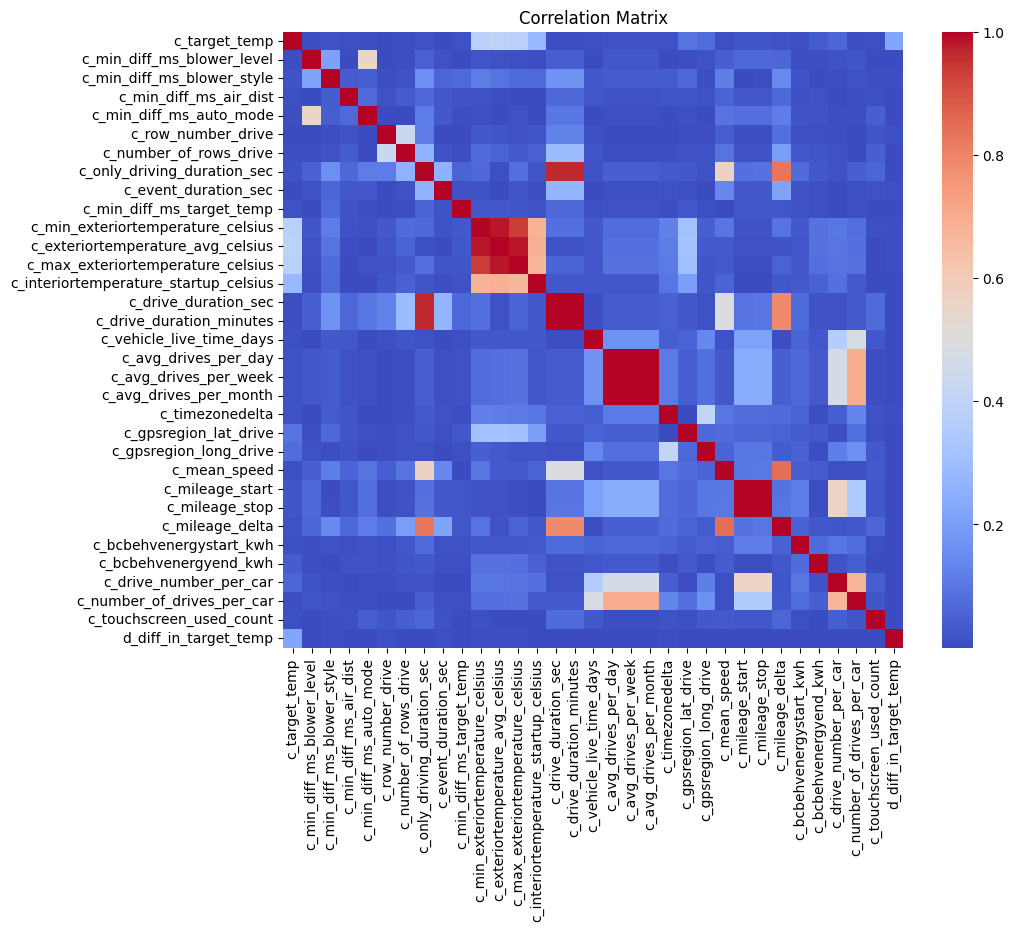

In [93]:
# Plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()